# Explorar visual y estadísticamente el dataset limpio para descubrir patrones, tendencias, relaciones y generar hipótesis.

**Autor:** Jean Pool Marín Betancur  
**Fecha:** 2025-06-05
**Versión:** 1.0  

---
# 1. Configuración del Entorno e Importaciones:
---

In [2]:
# Se importan las librerias necesarias
import os
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Se importan las librerias personalizadas
sys.path.append(os.path.abspath('..'))
import src.data_loader as dl


In [3]:
# Configración de Pandas
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', '{:,.2f}'.format)
pd.set_option('display.max_rows', 50)

# Configuración de Matplotlib
plt.style.use('seaborn-v0_8')
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 12
plt.rcParams['axes.titlesize'] = 14
plt.rcParams['axes.labelsize'] = 12

# Configuación de NumPy
np.set_printoptions(precision=2, suppress=True)

In [4]:
# Se define la ruta y se cargan los datos limpios.
data_path = os.path.join('..', 'data','processed', 'US_Renewable_Energy_Consumption_Imputed.csv')
df_processed = pd.read_csv(data_path , index_col='Datetime', parse_dates=True)

In [5]:
# Se redefinen en una lista las columnas de interés.
consumption_columns = [
    'Hydroelectric Power', 'Geothermal Energy', 'Solar Energy',
    'Wind Energy', 'Wood Energy', 'Waste Energy',
    'Fuel Ethanol, Excluding Denaturant','Biomass Losses and Co-products',
    'Biomass Energy','Renewable Diesel Fuel',
    'Other Biofuels','Conventional Hydroelectric Power', 'Biodiesel'
]

## 2. Analisis Global de Consumo:

La gráfica que muestra el `consumo total de energía renovable entre 1973 y 2024` refleja un crecimiento constante y sostenido, señalando una transición gradual pero firme hacia fuentes de energía más limpias. Este cambio responde tanto al aumento en la demanda de energías renovables como a su creciente disponibilidad en el mercado energético estadounidense.

Este proceso puede dividirse en tres etapas claras. La primera, entre 1973 y 1984, marca el inicio de la transición, impulsada en parte por la crisis del petróleo de 1973, que evidenció la vulnerabilidad de depender de combustibles fósiles. En esta etapa, fuentes como la hidroeléctrica comenzaron a ganar relevancia.

La segunda etapa, entre 1984 y 1999, se caracteriza por una estacionalidad en el consumo, con fluctuaciones que reflejan una falta de crecimiento sostenido. Esto se debió a la estabilización de las tecnologías disponibles y a una menor presión por diversificar la matriz energética con nuevas fuentes.

A partir del año 2000, el panorama cambia radicalmente. El consumo de energías renovables se incrementa de forma continua, impulsado por la urgencia de enfrentar el cambio climático, la implementación de políticas ambientales y el desarrollo de tecnologías más eficientes y competitivas. Innovaciones en energía solar, eólica y almacenamiento han reducido los costos y mejorado el rendimiento, facilitando una transición energética más accesible, escalable y sostenible. A diferencia de la energía hidroeléctrica tradicional, estas nuevas fuentes presentan menor impacto ambiental y mayor adaptabilidad, consolidándose como pilares de la matriz energética actual.

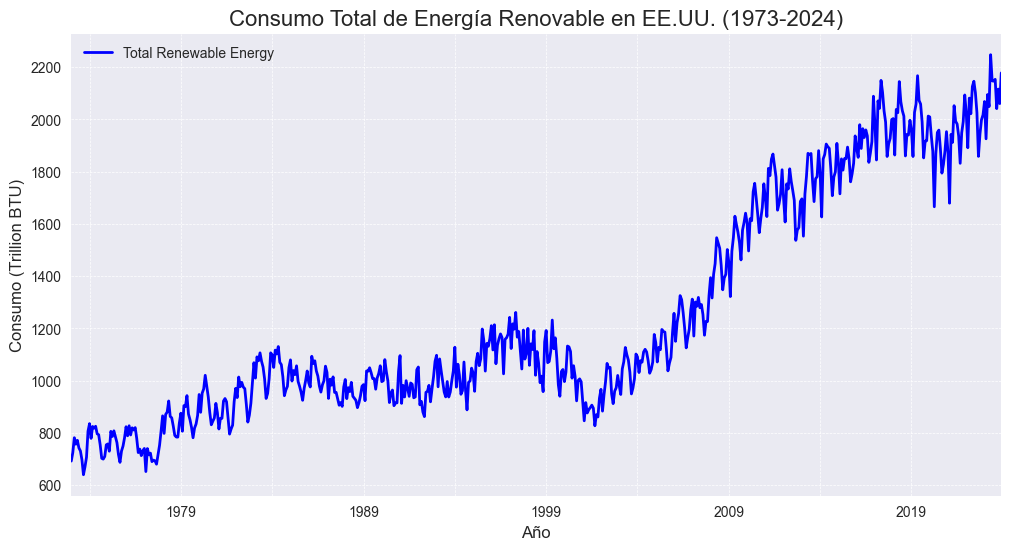

In [6]:
# Se gráfica la evolución de las energías renovables en total en estados unidos.

df_processed_2 = df_processed.groupby(['Datetime'])
df_processed_2 = df_processed_2['Total Renewable Energy'].sum()
df_processed_2.plot(kind='line', linewidth=2, color='blue')
plt.title('Consumo Total de Energía Renovable en EE.UU. (1973-2024)', fontsize=16)
plt.xlabel('Año', fontsize=12)
plt.ylabel('Consumo (Trillion BTU)', fontsize=12)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.legend(title='', fontsize=10)
plt.show()


## 3. Analisis por Fuente de Energía.

Como se observa en la gráfica `Evolución del Consumo por Fuente de Energía Renovable (1973-2024)`, el comportamiento de las fuentes de energía renovable ha variado significativamente a lo largo del tiempo. Se identifican cuatro grupos principales. El primero incluye fuentes emergentes como la energía solar, eólica y diversos biocombustibles, cuyo crecimiento ha sido acelerado en los últimos años gracias a los avances tecnológicos y las políticas de transición energética. Este patrón también se evidencia en la gráfica `Distribución del Consumo Mensual por Fuente de Energía`, donde estas fuentes presentan numerosos valores atípicos debido a su rápido aumento reciente.

En contraste, fuentes como la `Geothermal Energy`, `Conventional Hidroelectric Power` y de residuos se han mantenido estables, posiblemente por limitaciones en sus recursos naturales o por su ya consolidada infraestructura. Un tercer grupo, como la `Hydroelectric Power` y la `Wood Energy`, ha mostrado un declive, asociado al envejecimiento tecnológico, disponibilidad limitada de recursos y regulaciones ambientales más estrictas. Finalmente, la `Biomass Energy` representa un caso de crecimiento lento y prolongado, condicionado por su compleja producción.

Estos cambios también se reflejan en la composición global del consumo energético renovable, como muestra la gráfica `Evolución del Consumo Energético por Fuente (Años Seleccionados)`. Mientras que en 1973 dominaba la `Conventional Hydroelectric Power`, en 2023 su participación se ha reducido a un 16.1%, dando paso a una matriz más diversa, eficiente y sostenible, con un protagonismo creciente de fuentes como la solar, la eólica y los biocombustibles.

* Tendencias Individuales por fuente

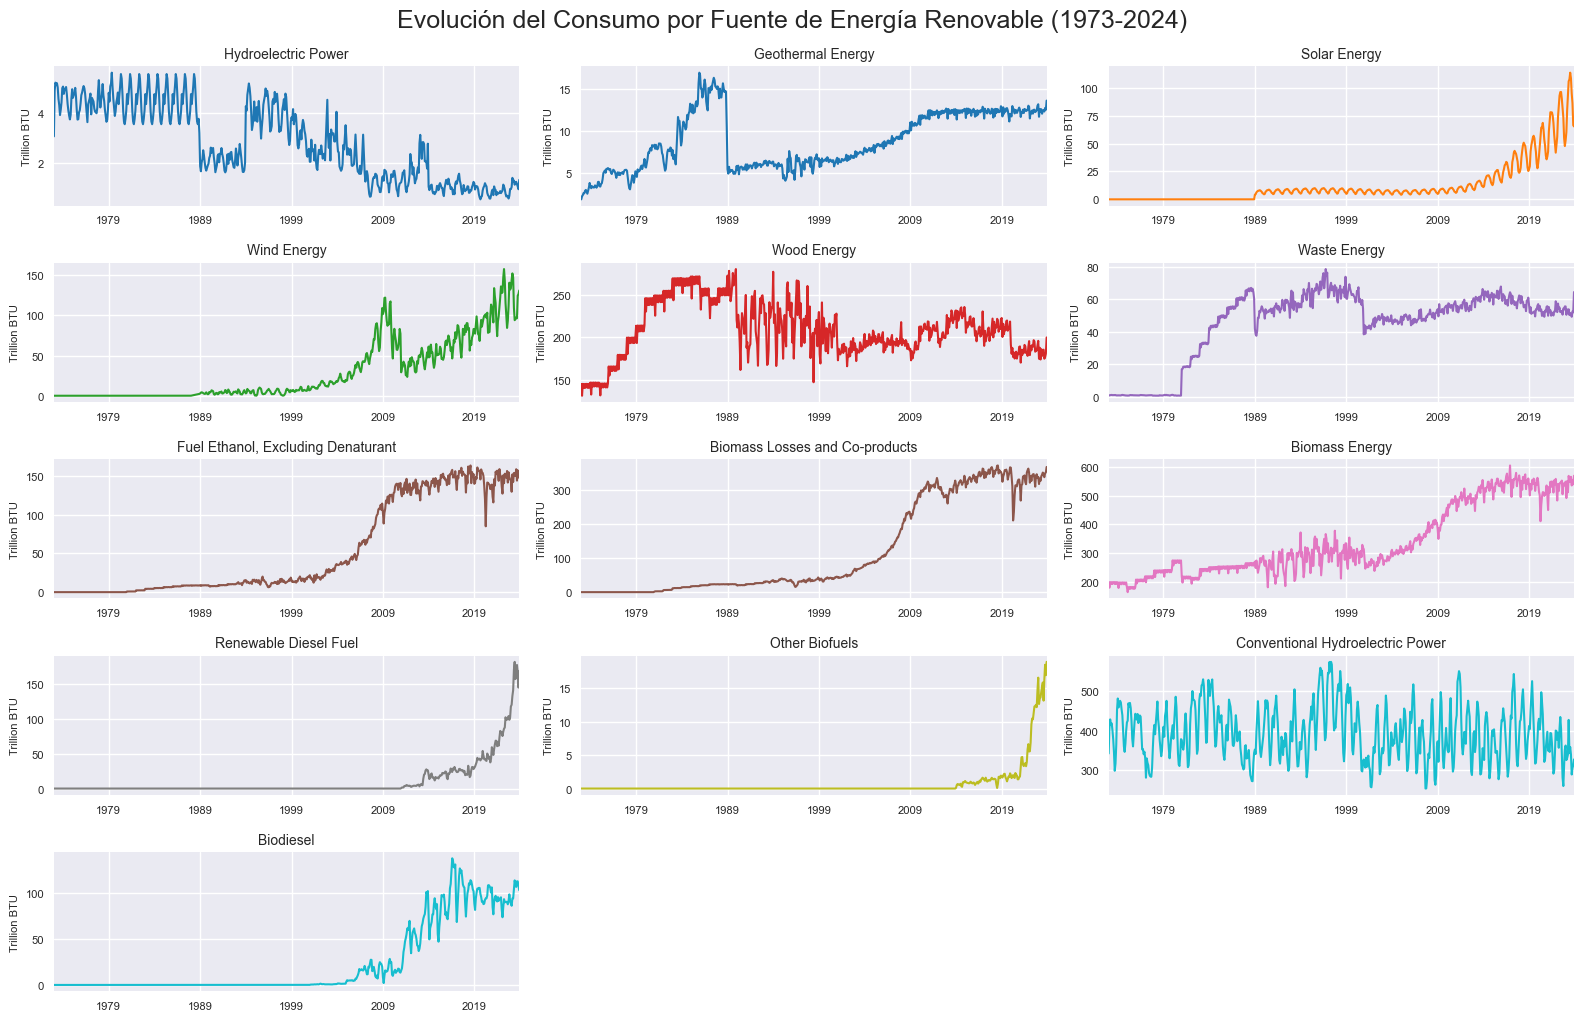

In [12]:
# Gráfica de cada fuente de energía a lo largo del tiempo
plt.figure(figsize=(16, 10))
for i, col in enumerate(consumption_columns):
    df_processed_3 = df_processed.groupby(['Datetime']).agg({col: 'sum'})
    plt.subplot( (len(consumption_columns) + 2) // 3 , 3, i + 1) # Ajusta el layout de subplots
    colores = plt.cm.tab10(np.linspace(0, 1, 13))
    df_processed_3[col].plot(linewidth=1.5, color=colores[i % len(colores)])
    plt.title(col, fontsize=10)
    plt.xlabel('')
    plt.ylabel('Trillion BTU', fontsize=8)
    plt.xticks(fontsize=8)
    plt.yticks(fontsize=8)

plt.tight_layout() # Ajusta el espaciado entre subplots
plt.suptitle('Evolución del Consumo por Fuente de Energía Renovable (1973-2024)', fontsize=18, y=1.02)
plt.show()


* Distribuciones de los datos por fuente

C:\Users\acer\AppData\Local\Temp\ipykernel_8144\4154119607.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Fuente de Energía', y='Consumo (Trillion BTU)', data=df_melted_sources, palette='viridis')


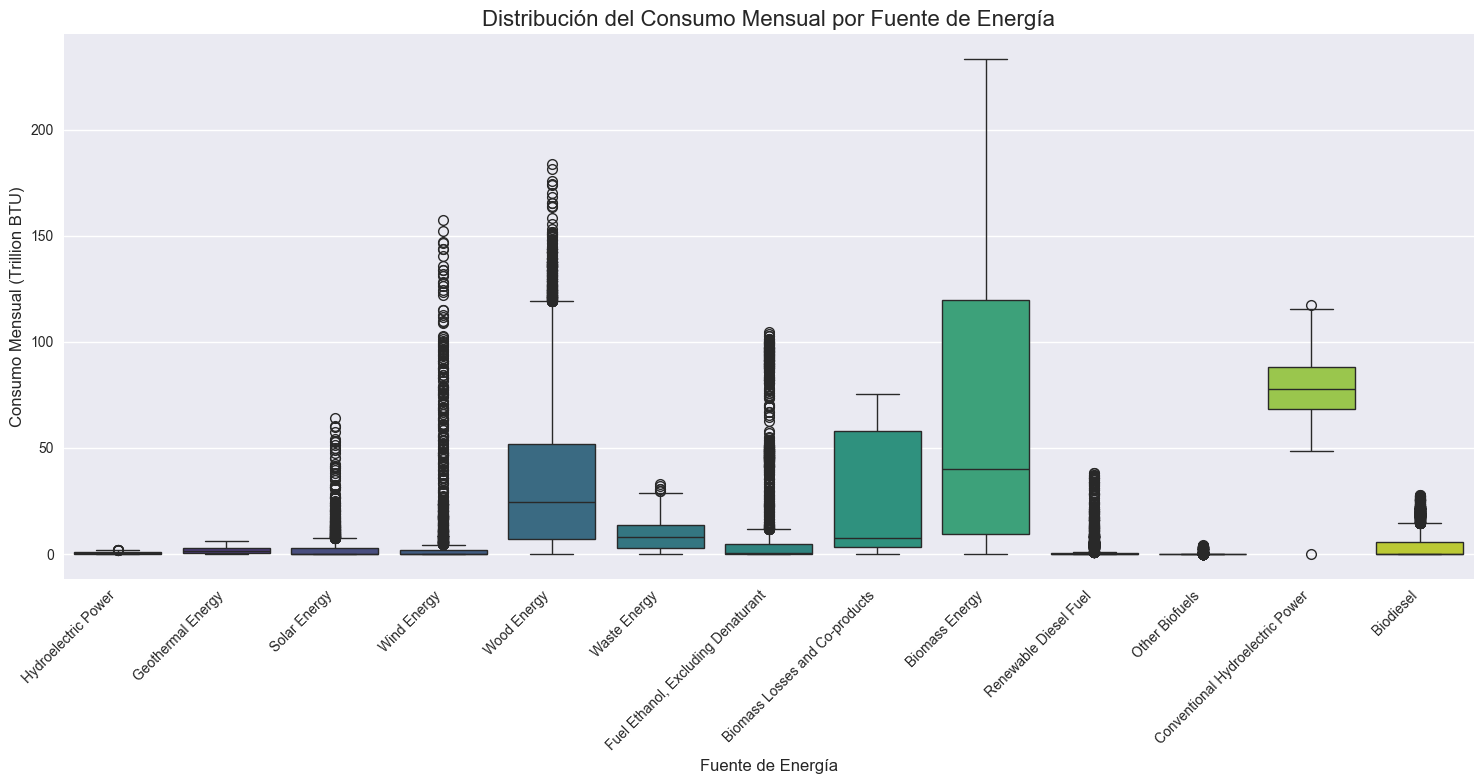

In [8]:
# Se realizan los gráficos de las distribuciones de cada una de las fuentes de energía.
plt.figure(figsize=(15, 8))
# Usaremos un melt para facilitar el boxplot con seaborn
df_melted_sources = df_processed[consumption_columns].melt(var_name='Fuente de Energía', value_name='Consumo (Trillion BTU)')
sns.boxplot(x='Fuente de Energía', y='Consumo (Trillion BTU)', data=df_melted_sources, palette='viridis')
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.title('Distribución del Consumo Mensual por Fuente de Energía', fontsize=16)
plt.xlabel('Fuente de Energía', fontsize=12)
plt.ylabel('Consumo Mensual (Trillion BTU)', fontsize=12)
plt.tight_layout()
plt.show()

* Composición del mix energético.

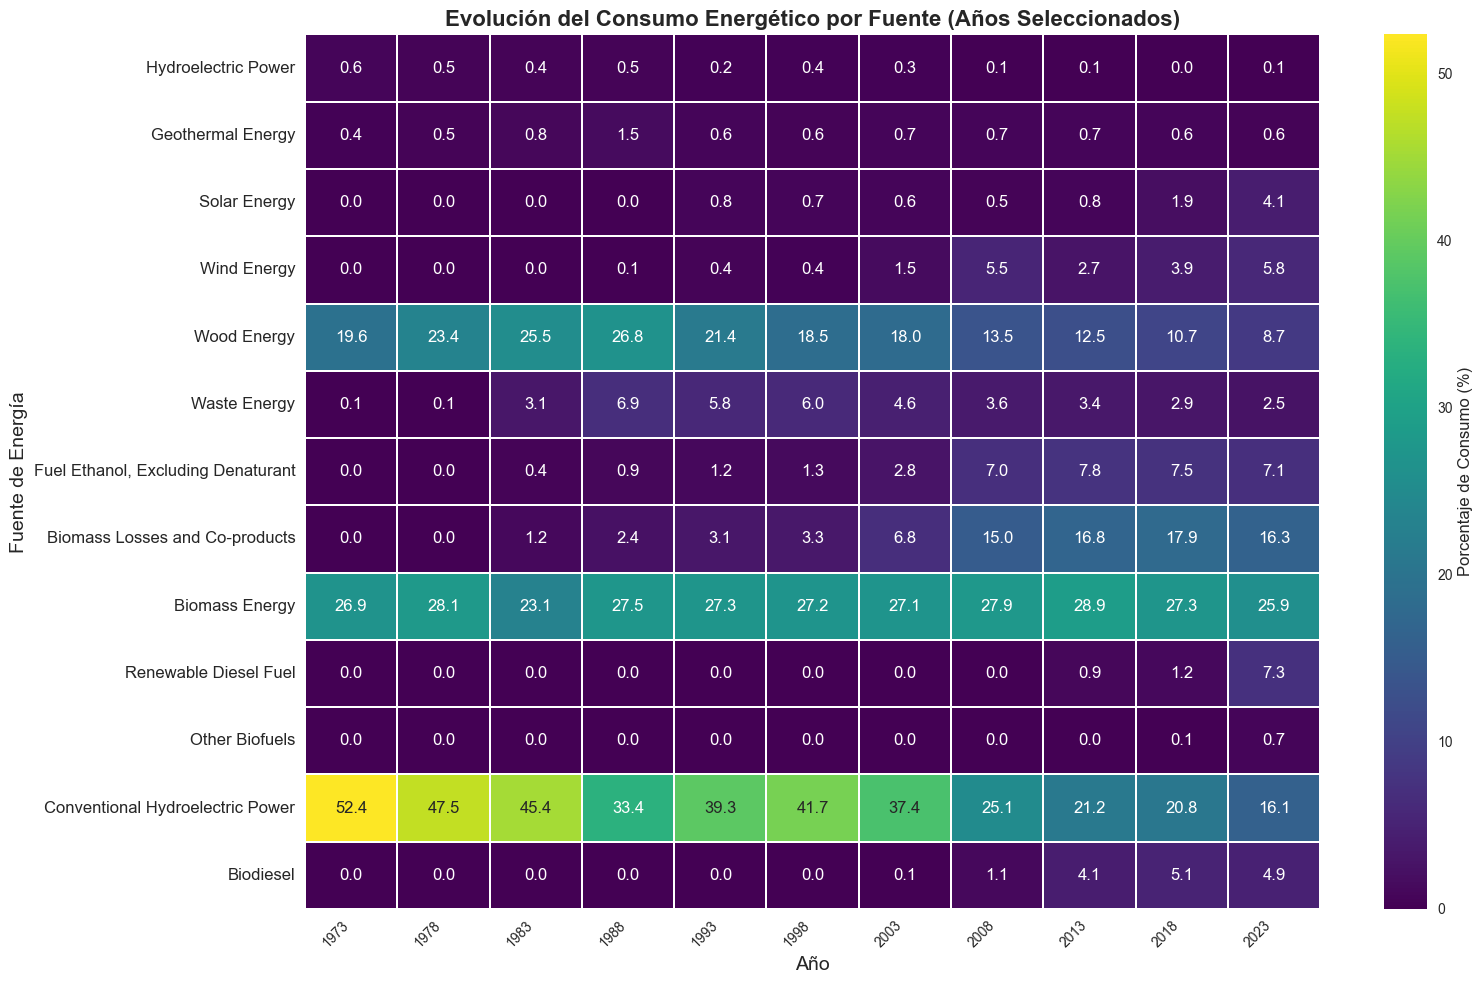

In [9]:
# Se realiza el graficó de calor para observar el porcentaje de consumo de cada fuente de energía por años.
dl.mix_heatmap(df_processed, consumption_columns)

## 4. Análisis por sector.


Desde 1973 hasta la actualidad, el sector `industrial` ha sido el mayor consumidor de energías renovables en Estados Unidos, como se muestra en la gráfica `Consumo Total de Energía Renovable por Sector (1973–2024)`. Esta predominancia se debe a la alta demanda energética de industrias como la manufactura, la química y la metalúrgica, que requieren un suministro continuo y de gran volumen. Además, la adopción de políticas fiscales y económicas favorables, junto con la inversión de grandes corporaciones como Google, Amazon y Tesla en fuentes renovables, ha acelerado la transición energética en este sector.

A lo largo del período analizado, todos los sectores han incrementado su consumo de energía renovable, aunque con distintos ritmos. El sector `residencial` y el de transporte han mostrado un crecimiento gradual, y desde 2016, su consumo es prácticamente equivalente. Por otro lado, el sector eléctrico ha mantenido un aumento constante, aunque más moderado, impulsando la transición energética desde una base más estable. En contraste, el sector `comercial` ha sido el de menor inversión y consumo, consolidándose como el menos relevante en términos de uso de energías renovables.

Finalmente, como se aprecia también en la gráfica `Consumo Total de Energía Renovable por Sector (1973–2024)`, el sector `industrial` ha llegado a superar los 25,000 trillones de BTU por año en consumo renovable, confirmando su rol central en la transformación energética del país.

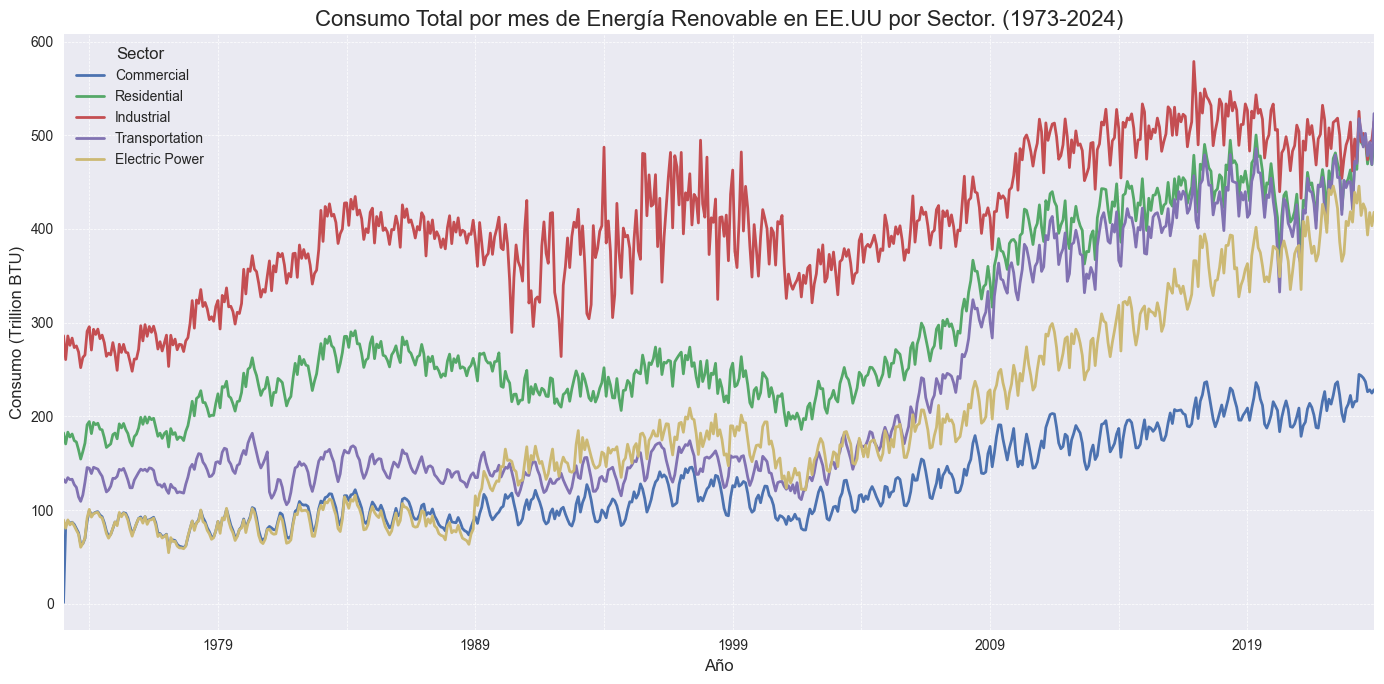

In [10]:
# Gráfico de líneas del consumo total de renovables por cada sector a lo largo del tiempo.
dl.plot_sector_consumo(df_processed, consumption_columns)

<Figure size 1600x1000 with 0 Axes>

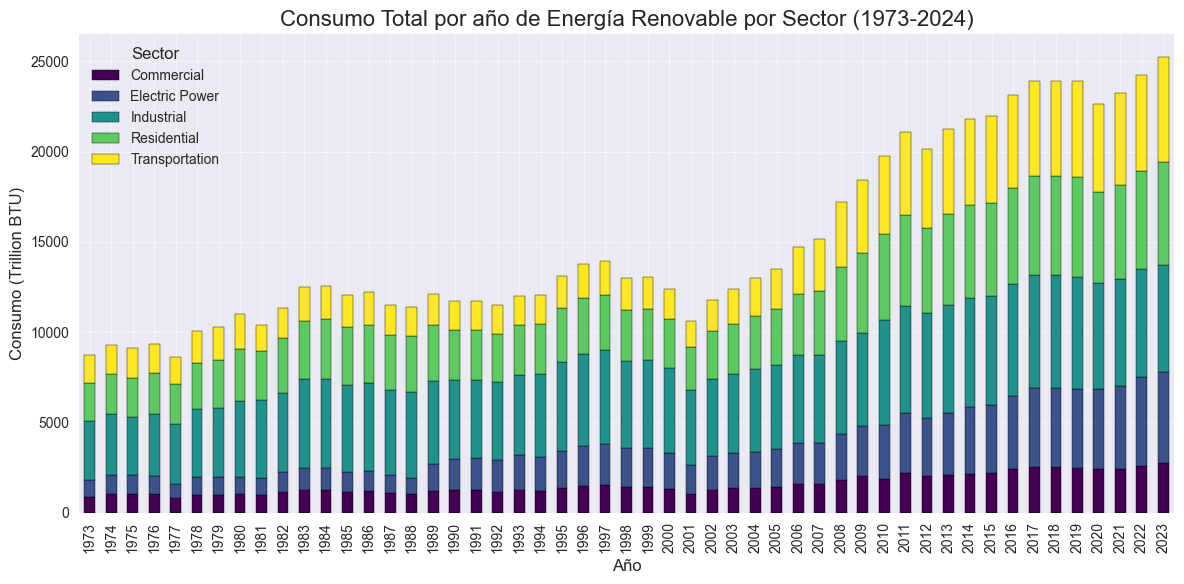

In [11]:
dl.bar_sector_consumo(df_processed, consumption_columns)

## . Resumen de Hallazgos Clave del EDA

### Patrones, Tendencias y Relaciones Observadas

* **Tendencia General**: El consumo total de energía renovable muestra un crecimiento claro a lo largo del período analizado (1973–2024), con fases de crecimiento más pronunciado en las décadas recientes.
* **Estacionalidad**: Se identifica una tendencia entre los años 1984 al 2000, en los cuales el consumo de energías renovables, oscila en el mismo intervalo de valores, sin presentar en si un crecimiento o decrecimiento en comparación con años posteriores. Ver Figura *Consumo Total de Energías Renovables*.

* **Contribución por Fuente**:

  * **Hidroeléctrica**: Fuente históricamente dominante, con fluctuaciones moderadas año a año, pricipalmente en las primeras decadas antes del 2000. Ver Figura *Mapa de Calor de Contribución por fuente*
  * **Eólica y Solar**: Inicio de aportes bajos hasta finales de los años 90, seguido de un crecimiento sostenido en los últimos años. Ver Figura *Consumo de Energía Renovable por Fuente* 
  * **Biomasa y Otros Biocombustibles**: Presencia relativamente estable, con una leve tendencia al alza en la última década. Ver Figura *Consumo Total de Energías Renovables*

* **Distribución por Sector**:

  * **Industrial**: Tradicionalmente mayor consumidor de renovables, especialmente biomasa y dendroenergía, pero la energía solar y eólica han tenido un crecimiento muy bajo en este sector. Ver Figura *Consumo de Energía Renovable por Sector*
  * **Residencial y Sector Eléctrico**: Han incrementado gradualmente su participación, impulsados por la adopción de tecnologías solares a pequeña escala.
  * **Comercial**: Sector con menor participación en el uso de renovables durante todo el período.

### Hipótesis para Investigación y Modelado

1. **Crecimiento Acelerado Post‑2000**

    * **Hipótesis**: La tasa de crecimiento anual del consumo de energía renovable desde el año 2000 es significativamente mayor que la tasa entre 1973 y 2000.

2. **Estabilidad intermedia (1984–2000)**

    * **Hipótesis**: Entre 1984 y 2000, las variaciones en el consumo renovable se deben principalmente a la hidroelectricidad, mientras que a partir de 2000 cobran más peso las fuentes eólica y solar.

3. **Efecto de Madurez de Tecnología en eólica y solar**

    * **Hipótesis**: El crecimiento sostenido de eólica y solar después de 2000 se explica por la caída de sus costos nivelados de energía (LCOE).

4. **Industrial como Principal Motor de Demanda**

    * **Hipótesis**: El consumo renovable del sector industrial está positivamente correlacionado con el índice de producción industrial (IPI).